In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 200

## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

**Delivery time - Predict delivery time using sorting time**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/04_Simple%20Linear%20Regression/Dataset/delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Performing EDA on the given dataset

## Applying Descriptive Statistics

In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

## Visualizing The Data

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

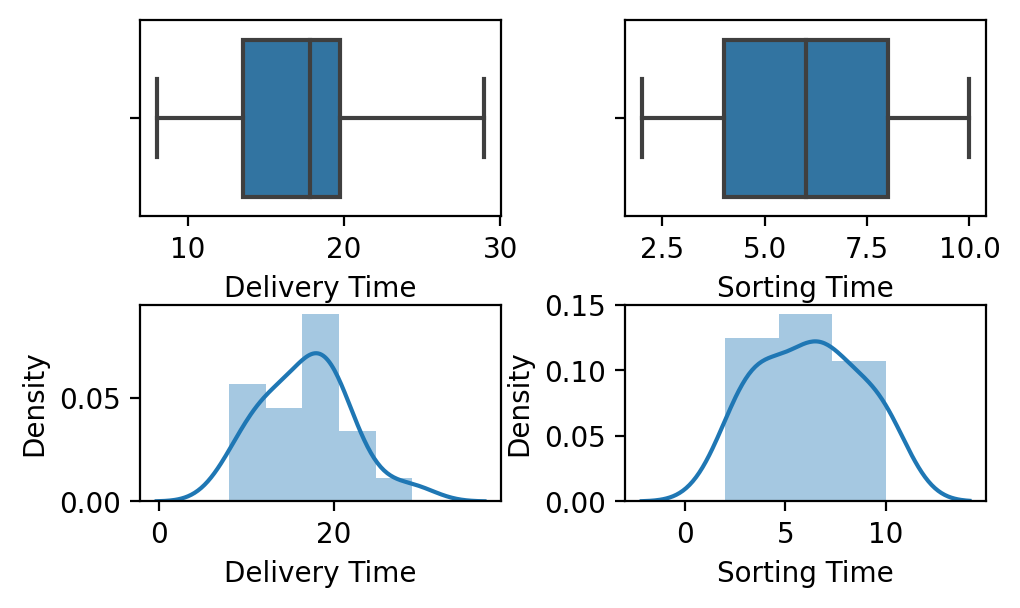

In [16]:
fig, ax = plt.subplots(2,2)
plt.tight_layout()

sns.boxplot(df['Delivery Time'], ax = ax[0,0])
sns.boxplot(df['Sorting Time'], ax = ax[0,1])
sns.distplot(df['Delivery Time'], ax = ax[1,0])
sns.distplot(df['Sorting Time'], ax = ax[1,1])

In [22]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


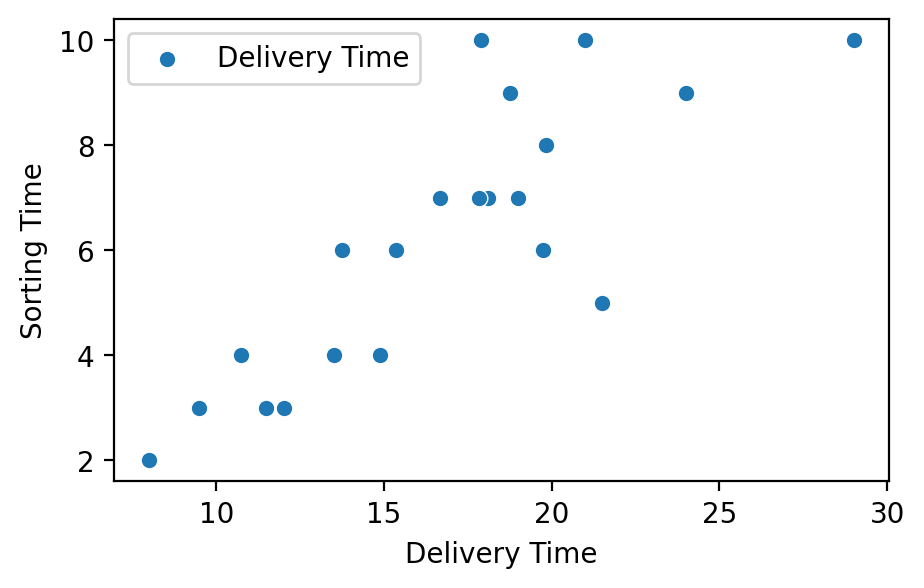

In [21]:
l = df.corr()

sns.scatterplot(df['Delivery Time'],df['Sorting Time'])
plt.legend(l)

<AxesSubplot:>

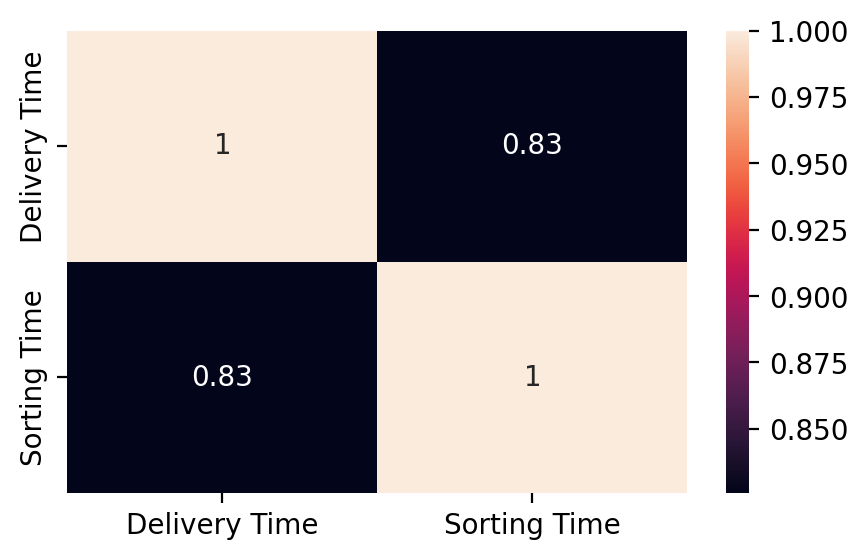

In [18]:
sns.heatmap(df.corr(), annot=True)